In [2]:
import json 
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 


In [3]:


path = "/Users/grahamjaeger/um/Data/redlist_species_data_a0feff8b-d3ac-4eca-a327-6b3afb897e32/points_data.csv"
df = pd.read_csv(path)
print(df)


/var/folders/hk/ywl7_8hd7vx86n9j6zmy5dgc0000gn/T/ipykernel_25101/909428740.py:2: DtypeWarning: Columns (10,11,12,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


         assessment_id      id_no              sci_name  presence  origin  \
0               754210     157940  Hirtella zanzibarica         1       1   
1               754210     157940  Hirtella zanzibarica         1       1   
2               754210     157940  Hirtella zanzibarica         1       1   
3               754210     157940  Hirtella zanzibarica         1       1   
4               754210     157940  Hirtella zanzibarica         1       1   
...                ...        ...                   ...       ...     ...   
4475048      223078273  128048676    Euphorbia adjurana         1       1   
4475049      223078273  128048676    Euphorbia adjurana         1       1   
4475050      223078273  128048676    Euphorbia adjurana         1       1   
4475051      223078273  128048676    Euphorbia adjurana         1       1   
4475052      223078273  128048676    Euphorbia adjurana         1       1   

         seasonal                                           compiler    yea

In [4]:
print(df.columns)


Index(['assessment_id', 'id_no', 'sci_name', 'presence', 'origin', 'seasonal',
       'compiler', 'year', 'citation', 'legend', 'subspecies', 'subpop',
       'dist_comm', 'island', 'tax_comm', 'source', 'basisofrec', 'event_year',
       'longitude', 'latitude'],
      dtype='object')


In [9]:
count_unique_sci_names = df['sci_name'].nunique()
print(count_unique_sci_names)


33183


                             origin   longitude   latitude
sci_name                                                  
Abarema adenophora                1  -84.180000  10.650000
Abarema auriculata                1  -59.995308  -3.067324
Abarema barbouriana               1  -78.213056  -3.040555
Abarema brachystachya             1  -38.084400 -11.941900
Abarema callejasii                1  -75.571515   6.926773
...                             ...         ...        ...
Zygogynum sylvestre               1  146.841967  -7.626167
Zygogynum tanyostigma             1  164.768407 -20.582439
Zygogynum vieillardii             1  165.765300 -21.454400
Zygoruellia richardii             1   44.767914 -18.825717
Zygotritonia benishangulana       1   34.330600  10.025800

[33183 rows x 3 columns]


In [31]:
def get_quadrant(row):
    if row['latitude'] >= 0 and row['longitude'] >= 0:
        return 'Quadrant NE'
    elif row['latitude'] >= 0 and row['longitude'] < 0:
        return 'Quadrant NW'
    elif row['latitude'] < 0 and row['longitude'] < 0:
        return 'Quadrant SW'
    else:
        return 'Quadrant SE'

# apply the function to each row and add the quadrant column to the dataframe
df['quadrant'] = df.apply(get_quadrant, axis=1)

# print the updated dataframe
print(df)

         assessment_id      id_no              sci_name  presence  origin  \
0               754210     157940  Hirtella zanzibarica         1       1   
1               754210     157940  Hirtella zanzibarica         1       1   
2               754210     157940  Hirtella zanzibarica         1       1   
3               754210     157940  Hirtella zanzibarica         1       1   
4               754210     157940  Hirtella zanzibarica         1       1   
...                ...        ...                   ...       ...     ...   
4475048      223078273  128048676    Euphorbia adjurana         1       1   
4475049      223078273  128048676    Euphorbia adjurana         1       1   
4475050      223078273  128048676    Euphorbia adjurana         1       1   
4475051      223078273  128048676    Euphorbia adjurana         1       1   
4475052      223078273  128048676    Euphorbia adjurana         1       1   

         seasonal                                           compiler    yea

In [32]:
new_df = df['quadrant']

In [33]:
new_df.value_counts()


Quadrant NW    1570228
Quadrant SE    1179350
Quadrant NE    1034913
Quadrant SW     690562
Name: quadrant, dtype: int64

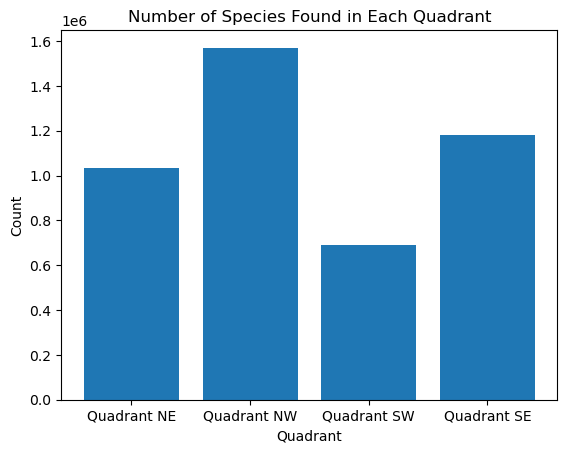

In [34]:
quadrants = ['Quadrant NE', 'Quadrant NW', 'Quadrant SW', 'Quadrant SE']
counts = [1034913, 1570228, 690562, 1179350]

# Create a bar chart
plt.bar(quadrants, counts)

# Add labels and title
plt.xlabel('Quadrant')
plt.ylabel('Count')
plt.title('Number of Species Found in Each Quadrant')

# Display the chart
plt.show()